# Tarea 6: Reducción de Dimensiones: caso de insuficiencia cardiaca 

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la tarea 6, en la que se usará la reducción de dimensiones para visualizar la estructura de datos en espacios de muchas dimensiones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder

## Cargar datos de insuficiencia cardiaca

Los datos quedarán almacenados en X y las etiquetas en y

Los datos originales tienen varias columnas categóricas, que requieren ser 
codificadas one-hot para que tenga sentido.

Cargamos entonces primero los datos crudos, convirtiendo esas columnas a números,
y posteriormente 

In [2]:
archivo_csv = 'heart.csv' 

## Es necesario manejar manualmente la conversión de varias columnas categóricas
converters={}
for i in range(12):
    converters[i] = lambda x : float(x)
    
converters[1] =  lambda x : 1.0 if (x==b'F') else 0.0

# TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
pain_types={b'TA':0.0,b'ATA':1.0,b'NAP':2.0,b'ASY':3.0}
converters[2] = lambda x : pain_types[x]

# RestingECG: resting electrocardiogram results 
#  Normal: Normal, 
#  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
restingECG_types={b'Normal':0.0,b'ST':1.0,b'LVH':2.0}
converters[6] = lambda x : restingECG_types[x]

converters[8] =  lambda x : 1.0 if (x==b'Y') else 0.0

stslope_type = {b'Up':1.0,b'Flat':0.0,b'Down':-1.0}
converters[10] = lambda x : stslope_type[x]

# Carguemos los datos
data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)

# Necesitamos recodificar dos columnas y luego armar la matriz de datos a pedazos
enc = OneHotEncoder()
cp=enc.fit_transform(data[:,2].reshape(-1,1)).toarray() # chest pain 
re=enc.fit_transform(data[:,6].reshape(-1,1)).toarray() # resting ECG

print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 918 x 12


In [3]:
# La última columna tiene las etiquetas
y=data[:,11].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=np.column_stack((data[:,0:2],cp,data[:,3:6],re,data[:,7:11]))
print("Data shape :",X.shape)

Label shape: (918,)
Data shape : (918, 16)


### Normalización de los datos

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("X normalized",X_normalized)

X normalized [[-1.4331398  -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359  1.93816322 -0.22967867 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972 -0.51595242 -0.22967867 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972  1.93816322 -0.22967867 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]]


In [6]:
from sklearn.decomposition import PCA

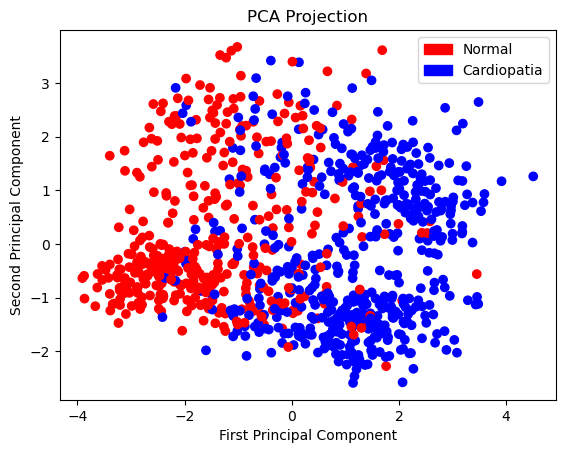

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

### Métodos de reducción de dimensiones:

# KPCA

In [8]:
from sklearn.decomposition import KernelPCA

In [9]:
kpca = KernelPCA(n_components=2, kernel='poly', gamma=1/10)
X_kpca = kpca.fit_transform(X_normalized)
print(X_kpca)

[[-0.25270119 -2.36809481]
 [-0.14458337 -0.72053322]
 [-0.27678223 -1.16910489]
 ...
 [-0.45667438  0.69264377]
 [ 0.07889663 -1.45408629]
 [-0.19793646 -1.36607488]]


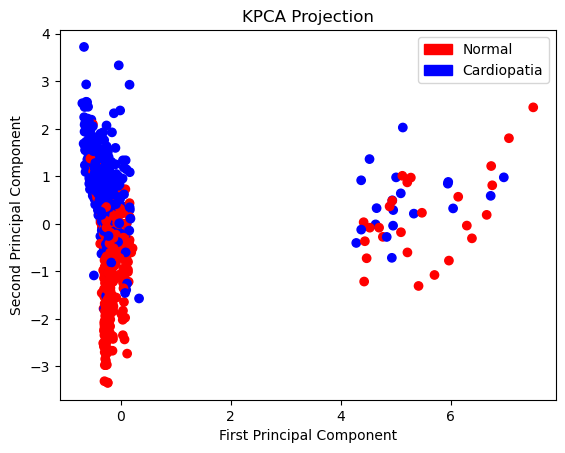

In [10]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KPCA Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# ISOMAP

In [11]:
from sklearn.manifold import Isomap

In [12]:
isomap = Isomap(n_components=2, n_neighbors=800, metric='manhattan')

isomap.fit(X_normalized)

X_isomap = isomap.transform(X_normalized)

print(X_isomap)

[[-9.73760788 -2.49625036]
 [-5.68279533 -1.37967647]
 [-6.09080643  4.2530191 ]
 ...
 [ 5.13820262 -4.23409821]
 [-7.45950005  8.75688383]
 [-8.89802315 -2.16472891]]


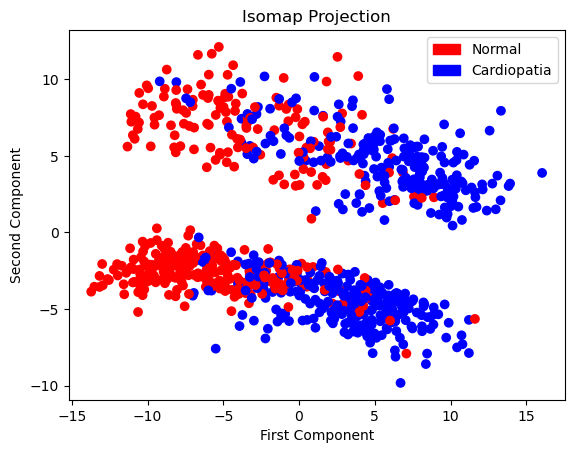

In [13]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Isomap Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

### Métodos de reducción de dimensiones (supervisado):

# PLS

In [14]:
from sklearn.cross_decomposition import PLSRegression

In [15]:
# Linear Discriminant Analysis (LDA)
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_normalized, y)[0]

# print the transformed data
print("LDA transformed data:")
print(X_pls)

LDA transformed data:
[[ 2.94437961 -0.85864588]
 [ 1.45553028  0.10806248]
 [ 1.8084946   1.38628186]
 ...
 [-1.774994   -0.71741483]
 [ 2.23881547  0.50133176]
 [ 2.42859547 -0.92884692]]


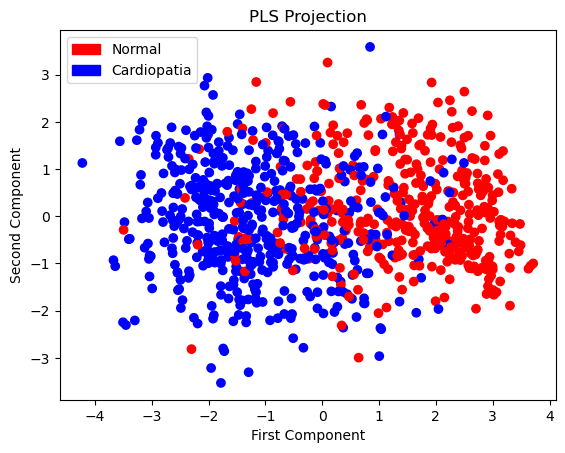

In [16]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PLS Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

# UMAP

In [17]:
import umap

In [18]:
reducer = umap.UMAP(n_components=4)
X_umap = reducer.fit_transform(X_normalized, y)

# print the transformed data
print("UMAP transformed data:")
print(X_umap)

UMAP transformed data:
[[13.517202  14.389075  13.754569   6.9741406]
 [13.589067  -4.293876  12.60023    3.3559937]
 [10.233444  12.188077   7.385788   6.2443924]
 ...
 [17.772192  -2.7421138 16.747171   5.653066 ]
 [14.941368  -1.4669985  5.629702  -2.2716312]
 [11.068131   3.949537  -2.2189224  7.032686 ]]


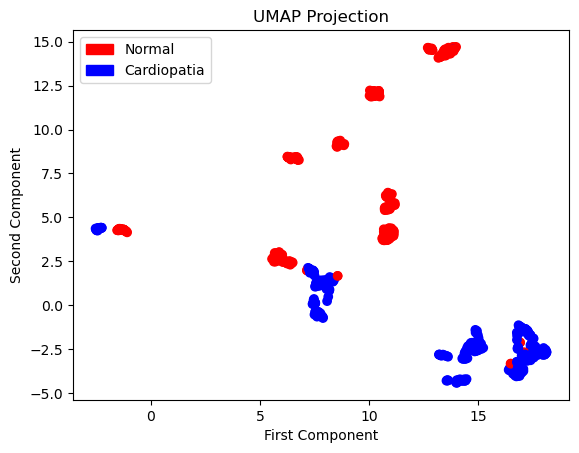

In [19]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('UMAP Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

# PaCMAP

In [20]:
import pacmap

In [21]:
# PaCMAP
reducer = pacmap.PaCMAP(n_components =4)
X_pacmap = reducer.fit_transform(X_normalized)

# print the transformed data
print("PaCMAP transformed data:")
print(X_pacmap)

PaCMAP transformed data:
[[-10.654101    -4.4338846   -1.3511182   -9.554935  ]
 [ -6.4529476    3.1832802    9.934229     8.201264  ]
 [ -0.3315884    2.1672149    9.753155    -6.7888403 ]
 ...
 [  7.659762    -8.677485    -6.1807923    0.38440266]
 [ -6.546206     5.6510677   -3.4885662   -8.708076  ]
 [ -6.2159696   -0.8407994    9.680109     9.692108  ]]


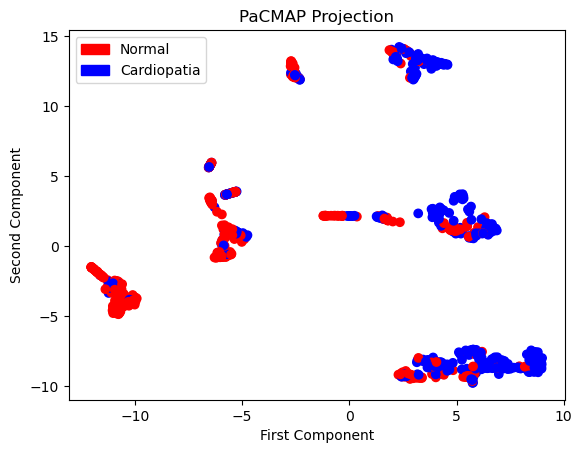

In [22]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PaCMAP Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

###  Aglomeración

# K-means

In [23]:
from sklearn.cluster import KMeans

In [24]:
def find_clusters(X, k, random_state=0):
    # create an instance of the KMeans class
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    
    # fit the data
    kmeans.fit(X)
    
    # get the cluster assignments
    clusters = kmeans.predict(X)
    
    return clusters

In [25]:
clusters = find_clusters(X_normalized, 9)

# print the cluster assignments
print("Cluster assignments:")
print(clusters)

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster assignments:
[3 1 3 8 1 1 3 3 8 3 1 4 3 8 1 3 6 3 6 3 5 3 3 8 1 1 4 3 3 3 1 1 8 4 3 3 8
 3 3 8 3 4 3 1 8 1 6 3 1 6 8 8 3 3 8 3 8 1 4 4 3 1 6 8 3 3 6 3 4 6 4 3 6 4
 8 1 6 6 3 6 1 3 6 3 8 8 8 3 5 8 3 6 3 8 1 8 3 1 6 3 4 6 8 8 6 3 4 3 6 3 3
 8 6 3 1 6 6 4 5 5 1 1 4 8 3 3 3 6 3 1 1 6 4 4 4 1 3 3 8 8 8 4 4 6 3 6 3 3
 3 8 3 3 3 6 3 8 6 6 8 3 2 8 3 3 3 5 4 3 6 1 3 1 3 1 8 8 8 3 1 6 8 3 8 4 3
 4 3 8 8 4 4 3 3 1 3 5 6 3 8 5 5 1 1 3 3 6 3 3 3 6 6 1 1 1 8 5 6 1 3 3 6 8
 1 1 3 6 1 8 3 6 6 1 3 6 3 3 8 5 8 8 3 8 8 3 8 5 1 4 4 8 6 8 4 3 8 1 3 1 1
 3 3 3 8 6 1 3 8 3 8 1 6 3 8 7 3 1 1 8 4 3 7 8 1 3 6 1 6 3 3 3 1 3 6 0 5 0
 0 4 0 4 0 3 0 4 0 0 0 4 0 0 6 0 6 6 0 4 1 0 0 0 1 0 6 0 4 0 1 0 0 4 1 4 1
 4 6 5 7 4 2 0 0 0 0 0 0 0 0 0 4 0 0 4 4 4 4 5 0 3 1 1 0 0 4 4 1 8 0 4 0 0
 0 0 0 0 0 4 1 4 0 4 4 0 0 6 6 0 0 2 0 4 0 4 2 0 0 0 5 4 0 4 0 4 4 0 0 0 0
 0 0 7 4 0 0 0 0 0 4 4 4 4 7 4 4 4 1 4 3 4 0 7 4 4 8 8 4 4 6 4 4 1 1 4 4 4
 8 4 4 4 8 1 0 4 4 0 0 4 0 0 4 4 4 0 8 6 0 1 4 3 4 3 0 0 4 4 3 2 2 0 4 7 0
 4 5

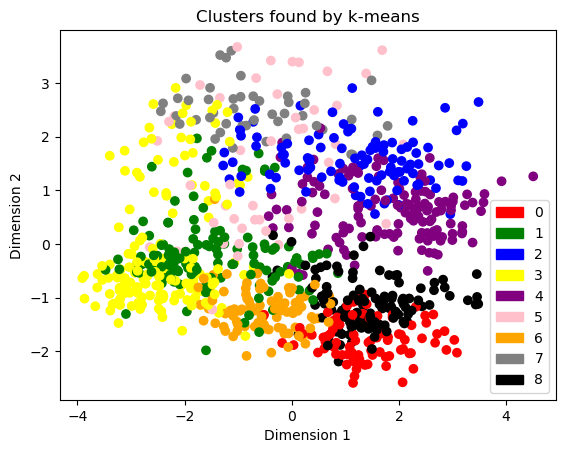

In [26]:
from matplotlib.colors import ListedColormap

# define tus propios colores
mis_colores = ['red', 'green', 'blue', 'yellow', 'purple', 'pink', 'orange', 'gray', 'black']

# crea una instancia de ListedColormap con tus colores
mi_paleta = ListedColormap(mis_colores)

# utiliza tu paleta de colores en la gráfica
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=mi_paleta)

# add axis labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# add a title
plt.title('Clusters found by k-means')


red_patch = mpatches.Patch(color='red', label='0')
green_patch = mpatches.Patch(color='green', label='1')
blue_patch = mpatches.Patch(color='blue', label='2')
yellow_patch = mpatches.Patch(color='yellow', label='3')
purple_patch = mpatches.Patch(color='purple', label='4')
pink_patch = mpatches.Patch(color='pink', label='5')
orange_patch = mpatches.Patch(color='orange', label='6')
gray_patch = mpatches.Patch(color='gray', label='7')
black_patch = mpatches.Patch(color='black', label='8')
plt.legend(handles=[red_patch, green_patch, blue_patch,yellow_patch, purple_patch, pink_patch, orange_patch, gray_patch, black_patch])

# show the plot
plt.show()